In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import warnings

from scipy.special import factorial

# 1. Numerical integration methods
Consider the integral
$$
    I=\int_0^1\sin^2\left(\sqrt{100x}\right) dx
$$

(a) Evaluate the integral using the adaptive trapezoidal method, using 1 integration slice (`h` = 1 in that case) and 16 iterations. Plot iterations VS computed values 

In [2]:
def trapezoidal(f, partitions):
    partitions = np.array(partitions)
    N = len(partitions) - 1
    dx = np.diff(partitions)
    x = (partitions[:-1] + partitions[1:]) / 2
    y = f(x)
    return np.sum(y * dx)

def adaptive_trapezoidal_iteration(f, a, b, n_iter, true_value=None):
    values = []
    errors = []
    T_prev = trapezoidal(f, [a, b])
    
    for i in range(n_iter):
        partitions = np.linspace(a, b, 2**i + 1)
        T = trapezoidal(f, partitions)
        errors.append(np.abs(T - true_value) if true_value is not None else np.abs(T - T_prev))
        values.append(T)
        T_prev = T
    
    return np.array(values), np.array(errors)

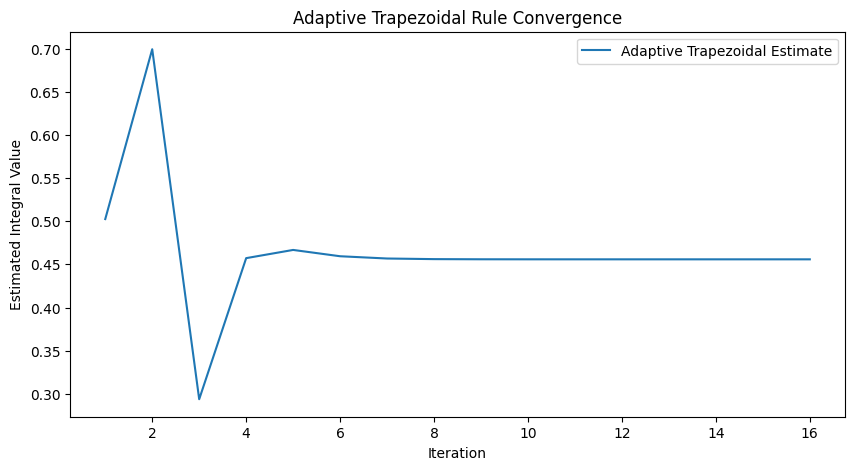

Final estimate: 0.4558325360124609


In [3]:
def f(x):
    return np.sin(np.sqrt(100 * x)) ** 2

N = 16
iter = range(1, N + 1)
vals, _ = adaptive_trapezoidal_iteration(f, 0, 1, N) 

plt.figure(figsize=(10, 5))
plt.plot(iter, vals, label='Adaptive Trapezoidal Estimate')
plt.xlabel("Iteration")
plt.ylabel("Estimated Integral Value")
plt.title("Adaptive Trapezoidal Rule Convergence")
plt.legend()
plt.show()
print("Final estimate:", vals[-1])

(b)	Evaluate the same integral with the Romberg integration technique based on your code (See p.161 in our main textbook). Plot iterations VS computed values. 

In [4]:
def romberg(f, a, b, n_iter, true_value=None):
    values = []
    errors = []
    R = np.zeros((n_iter, n_iter))
    
    for i in range(n_iter):
        partitions = np.linspace(a, b, 2**i + 1)
        R[i, 0] = trapezoidal(f, partitions)
        
        for j in range(1, i + 1):
            R[i, j] = (4**j * R[i, j - 1] - R[i - 1, j - 1]) / (4**j - 1)
        
        errors.append(np.abs(R[i, i] - true_value) if true_value is not None else 0)
        values.append(R[i, i])
    
    return np.array(values), np.array(errors)

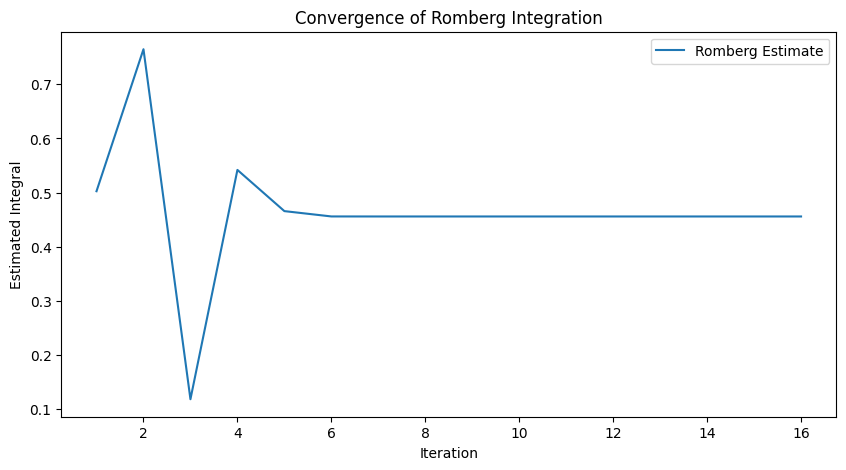

Final estimate: 0.45583253230908516


In [5]:
N = 16
iter = range(1, N + 1)
vals, _ = romberg(f, 0, 1, N) 

plt.figure(figsize=(10, 5))
plt.plot(iter, vals, label='Romberg Estimate')
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.title('Convergence of Romberg Integration')
plt.legend()
plt.show()
print("Final estimate:", vals[-1])



(c)	Compare the errors from the results (a) and (b), see what method reaches faster to the error $10^{-6}$

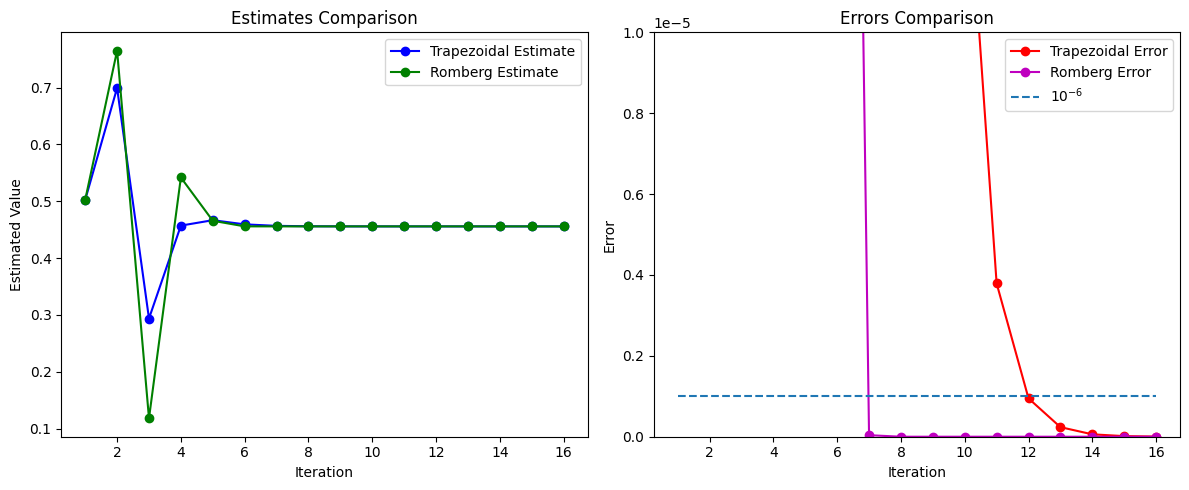

Trapezoidal final estimate: 0.4558325360124609
Romberg final estimate: 0.45583253230908516


In [6]:
N = 16
iter = range(1, N + 1)

true_val = vals[-1]
vals_trap, errs_trap = adaptive_trapezoidal_iteration(f, 0, 1, N, true_val)
vals_romb, errs_romb = romberg(f, 0, 1, N, true_val) 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(iter, vals_trap, 'b-o', label='Trapezoidal Estimate')
plt.plot(iter, vals_romb, 'g-o', label='Romberg Estimate')
plt.xlabel('Iteration')
plt.ylabel('Estimated Value')
plt.title('Estimates Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(iter, errs_trap, 'r-o', label='Trapezoidal Error')
plt.plot(iter, errs_romb, 'm-o', label='Romberg Error')
plt.plot(iter, np.full_like(iter, 1e-6, dtype=np.float64), '--', label='$10^{-6}$')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Errors Comparison')
plt.ylim(0, 1e-5)
plt.legend()

plt.tight_layout()
plt.show()

print("Trapezoidal final estimate:", vals_trap[-1])
print("Romberg final estimate:", vals_romb[-1])


Romberg's method converges faster than Trapezoidal.

(d)	Evaluate the integral using the adaptive Simpson’s rule method, with 2 integration slice (h = 0.5 in that case). Plot iterations VS computed values. 

In [7]:
def simpson(f, a, b, N):
    if N % 2 == 1:
        print("Warning: N is odd, Simpson's rule requires an even number of subintervals")
    dx = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    return dx / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]))

def adaptive_simpson_iteration(f, a, b, n_iter, true_value=None):
    values = []
    errors = []
    S_prev = simpson(f, a, b, 2)
    
    for i in range(n_iter):
        N = 2**(i + 1)
        S = simpson(f, a, b, N)
        errors.append(np.abs(S - true_value) if true_value is not None else np.abs(S - S_prev))
        values.append(S)
        S_prev = S
    
    return np.array(values), np.array(errors)

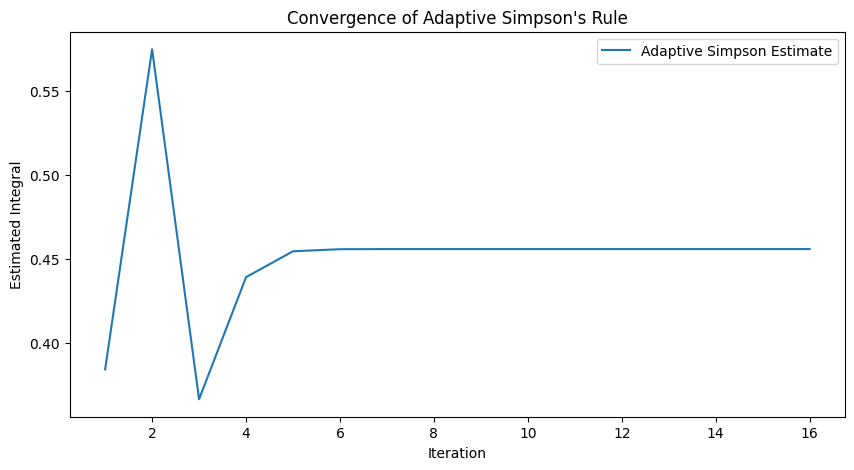

Final Simpson estimate: 0.45583253230908505


In [8]:
vals_simpson, errs_simpson = adaptive_simpson_iteration(f, 0, 1, N, true_val)

plt.figure(figsize=(10, 5))
plt.plot(range(1, N+1), vals_simpson, label="Adaptive Simpson Estimate")
plt.xlabel("Iteration")
plt.ylabel("Estimated Integral")
plt.title("Convergence of Adaptive Simpson's Rule")
plt.legend()
plt.show()

print("Final Simpson estimate:", vals_simpson[-1])

(e)	Apply Romberg integration technique to (d) and evaluate the integral by iterations. 

In [9]:
def romberg_simpson(f, a, b, n_iter, true_value=None):
    values = []
    errors = []
    R = np.zeros((n_iter, n_iter))
    
    for i in range(n_iter):
        R[i, 0] = simpson(f, a, b, 2**(i + 1))
        
        for j in range(1, i + 1):
            R[i, j] = (4**j * R[i, j - 1] - R[i - 1, j - 1]) / (4**j - 1)
        
        errors.append(np.abs(R[i, i] - true_value) if true_value is not None else 0)
        values.append(R[i, i])
    
    return np.array(values), np.array(errors)

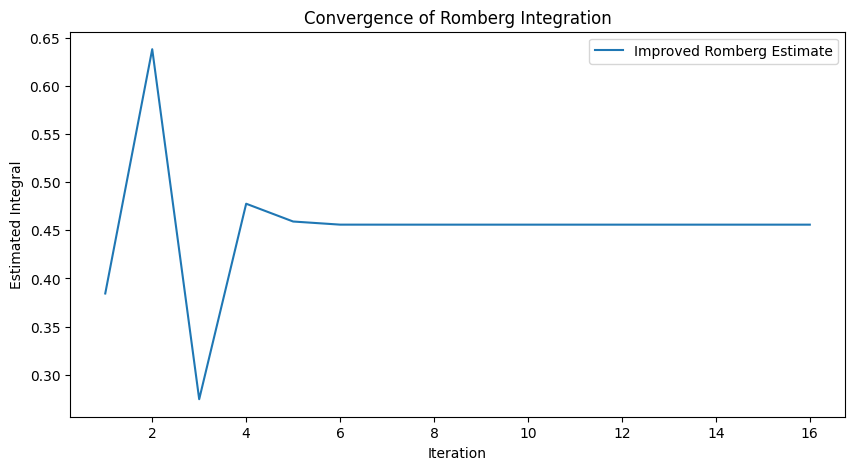

Final estimate: 0.45583253230908516


In [10]:
N = 16
iter = range(1, N + 1)
vals, _ = romberg_simpson(f, 0, 1, N) 

plt.figure(figsize=(10, 5))
plt.plot(iter, vals, label='Improved Romberg Estimate')
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.title('Convergence of Romberg Integration')
plt.legend()
plt.show()
print("Final estimate:", vals[-1])



(f)	What method converges faster between (d) and (e)? Compare the errors and find what method reaches to the error $10^-3$ faster.

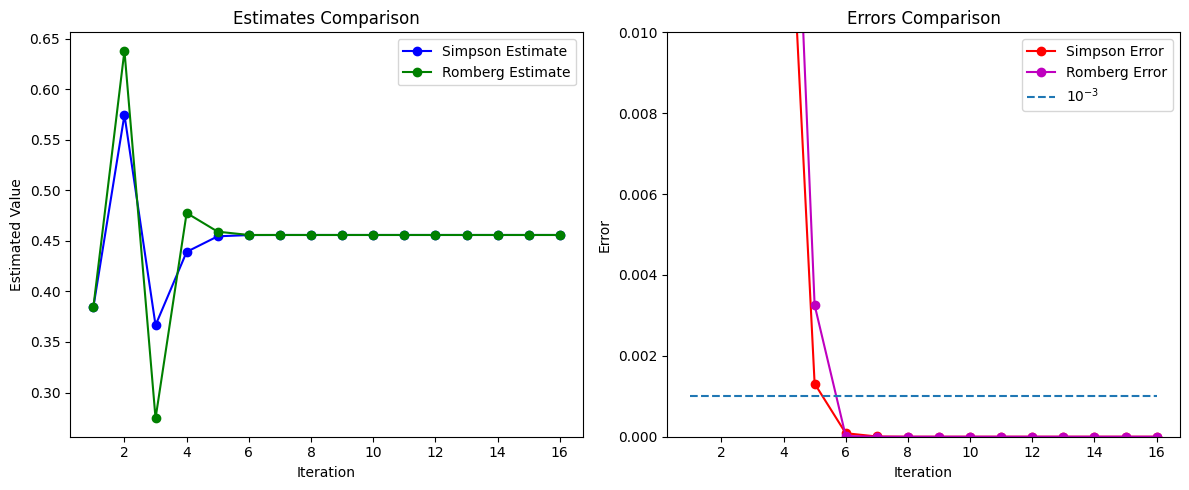

Trapezoidal final estimate: 0.45583253230908505
Romberg final estimate: 0.45583253230908516


In [11]:
N = 16
iter = range(1, N + 1)

true_val = vals[-1]
vals_trap, errs_trap = adaptive_simpson_iteration(f, 0, 1, N, true_val)
vals_romb, errs_romb = romberg_simpson(f, 0, 1, N, true_val) 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(iter, vals_trap, 'b-o', label='Simpson Estimate')
plt.plot(iter, vals_romb, 'g-o', label='Romberg Estimate')
plt.xlabel('Iteration')
plt.ylabel('Estimated Value')
plt.title('Estimates Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(iter, errs_trap, 'r-o', label='Simpson Error')
plt.plot(iter, errs_romb, 'm-o', label='Romberg Error')
plt.plot(iter, np.full_like(iter, 1e-3, dtype=np.float64), '--', label='$10^{-3}$')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Errors Comparison')
plt.ylim(0, 1e-2)
plt.legend()

plt.tight_layout()
plt.show()

print("Trapezoidal final estimate:", vals_trap[-1])
print("Romberg final estimate:", vals_romb[-1])


both simpson and romberg achive error less than $10^-3$ at the same time, 6th iterations.

# 2. Exercise  5.12

The plank theory of thermal radiation tells us that in the angular frequency interval $\omega$ to $\omega + d\omega$, a black body of unit area radiates electromagnetically an amount of thermal energy per second equal to $I(\omega)d\omega$, where
$$I(\omega)=\frac{\hbar}{4\pi^2c^2}\frac{\omega^3}{e^{\hbar\omega/k_{\mathrm{B}}T} - 1}.$$
Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light, and $k_{\mathrm{B}}$ is Boltzmann's constant.

(a) Show that the mathematical expression of the total rate at which energy is radiated by a black body per unit area, over all frequencies, is
$$W=\frac{k_{\mathrm{B}}^4T^4}{4\pi^2 c^2 \hbar^3} \int_{0}^\infty \frac{x^3}{e^x - 1} dx$$

Integrate the intensity over all frequency

\begin{align*}
W &= \int_0^\infty I(\omega)\,d\omega \\
  &= \int_0^\infty \frac{\hbar}{4\pi^2 c^2}\frac{\omega^3}{e^{\hbar\omega/(k_B T)}-1}\,d\omega \\
  &= \frac{\hbar}{4\pi^2 c^2} \int_0^\infty \frac{\omega^3}{e^{\hbar\omega/(k_B T)}-1}\,d\omega \\
x &= \frac{\hbar\omega}{k_B T}, \quad \omega=\frac{k_B T}{\hbar}x, \quad d\omega=\frac{k_B T}{\hbar}\,dx \\
W &= \frac{\hbar}{4\pi^2 c^2} \int_0^\infty \frac{\left(\frac{k_B T}{\hbar}x\right)^3}{e^x-1}\frac{k_B T}{\hbar}\,dx \\
  &= \frac{\hbar}{4\pi^2 c^2}\left(\frac{k_B T}{\hbar}\right)^4 \int_0^\infty \frac{x^3}{e^x-1}\,dx \\
  &= \frac{k_B^4 T^4}{4\pi^2 c^2 \hbar^3}\int_0^\infty \frac{x^3}{e^x-1}\,dx
\end{align*}

(b) Evaluate the integral and explain what method you used. 

Use the geometric series identity
$$\frac{1}{e^x-1} = \sum_{n=1}^{\infty} e^{-nx}$$

The integral becomes
$$\int_0^\infty \frac{x^3}{e^x-1}\,dx = \sum_{n=1}^{\infty} \int_0^\infty x^3 e^{-nx}\,dx$$

By the definition of the gamma function,
$$\int_0^\infty x^3 e^{-nx}\,dx = \frac{1}{n^4}\int_0^\infty u^3 e^{-u}\,du = \frac{\Gamma(4)}{n^4}$$

then the integral becomes a product of zeta function and gamma function

$$\int_0^\infty \frac{x^3}{e^x-1}\,dx = \sum_{n=1}^{\infty} \int_0^\infty x^3 e^{-nx}\,dx=\Gamma(4)\zeta(4)=3!\zeta(4)=6\frac{\pi^4}{90}=\frac{\pi^4}{15}$$

Hence the true value is 
$$\frac{\pi^4}{15} \approx 6.4939394022668...$$

In [12]:
true_value = np.pi ** 4 / 15
true_value

6.493939402266828

In the numerical treatment, the function
$$f(x) = \frac{x^3}{e^{x} - 1}$$
may occurs floating point error near $x = 0$.

Hence use taylor expension near $x = 0$ to prevent this:
$$f(x) = x^2 - \frac{x^3}{2} + \frac{x^4}{12} + \cdots$$

The error term of quadratic approximation is
$$|R_2(\epsilon)| < \frac{M}{3!} |x|^3$$
where
$$M > \sup_{x\in(0, \epsilon)} |f^{(3)}(x)| \approx 3$$

Therefore
$$|R_2(\epsilon)| < |x|^3$$

take $x = 10^{-3}$ then it is enough.

While we can handle an infinite range of integrals by substituting variables, since the function decays exponentially, we can also handle it by truncating the integrals appropriately.


\begin{align}
\frac{x^3}{e^x-1}  
&< \frac{x^3}{e^x} = x^3 e^{-x}\\
&< e^{x/2} e^{-x} = e^{-x/2} \quad (\text{for }x \geq 20)
\end{align}


and 

$$
\int_{20}^{\infty} e^{-x/2} dx = 2e^{-10} < 9.08 \times 10^{5}
$$

Hence we can approximate

$$\int_{0}^{\infty} \frac{x^3}{e^x - 1} dx \approx \int_{0}^{10^{-3}} x^2dx + \int_{10^{-3}}^{20} \frac{x^3}{e^x - 1} dx$$

during keeping the error less then $10^{-4}$.

Evaluating this integral with simpson's rule with $h = 10^{-1}$ give the error

$$\frac{1}{90}h^5 f^{(4)}(\xi) < \frac{1}{90}\cdot 10^{-5} \cdot 2 < 10^{-6}$$

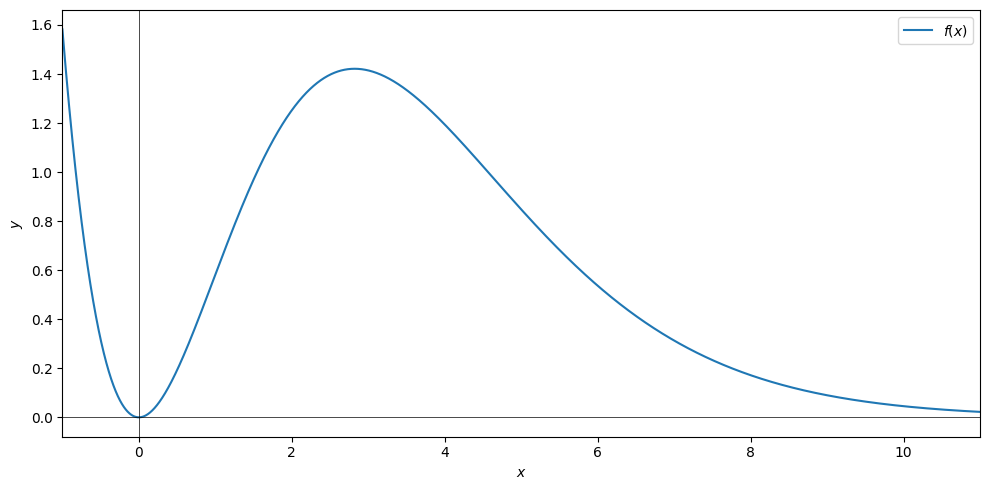

In [13]:
def f(x):
    return np.where(np.abs(x) < 1e-3, x**2, x ** 3 / (np.exp(x) - 1))

plt.figure(figsize=(10, 5))
x = np.linspace(-1, 11, 12001)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)
    y = f(x)

plt.plot(x, y, label='$f(x)$')
plt.axhline(0, color='black', linewidth=0.5)  # Draw horizontal x-axis
plt.axvline(0, color='black', linewidth=0.5)  # Draw vertical y-axis
plt.xlim(-1, 11)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)
    integrated_value = simpson(f, 0, 20, 200)

print(f"numerical integration: {integrated_value}, true value: {true_value}, error: {np.abs(integrated_value - true_value)}")

numerical integration: 6.4939218466093545, true value: 6.493939402266828, error: 1.75556574735225e-05


In [15]:
known_value = 5.670400e-8 # W m^-2 K^-4

planck_const = 6.62607015e-34 # J s
reduced_planck = planck_const / (2 * np.pi)
boltzmann_const = 1.380649e-23 # J K^-1
c = 299792458. # m s^-1

calculated_value = ((boltzmann_const ** 4)) / (4 * (np.pi ** 2) * (c ** 2) * (reduced_planck ** 3)) * integrated_value

print(f"calculated value: {calculated_value}, known value: {known_value}, error: {np.abs(known_value - calculated_value)}, relative error: {np.abs(known_value - calculated_value) / known_value * 100:.5f} %")

calculated value: 5.670359089945136e-08, known value: 5.6704e-08, error: 4.091005486421453e-13, relative error: 0.00072 %


# 3. Exercise 5.13

  The wave function of the nth energy level of the one-dimensional quantum harmonic oscillator is given by
$$\psi_n (x) = \frac{1}{\sqrt{2^n n!\sqrt{\pi}}}e^{-\frac{x^2}{2}}H_n(x)$$
(Wave function of a spinless point particle in a quadratic potential well, and in units where all the constants are 1). For $n=0, ..., \infty$, where $H_n(x)$ is the $n$-th Hermite polynomial, which satisfy a relation
$$H_{n+1}(x) = 2xH_n(x)-2nH_{n-1}(x)$$
The first two Hermite polynomials are $H_0(x)=1$ and $H_1(x)=2x$.

(a) Write a user-defined function $H(n, x)$ that calculates $H_n(x)$ for given $x$ and any intger $n\geq 0$. Plot the harmonic oscillator wavefunctions for $n = 0, 1, 2, \text{and}, 3$ together in the same graph, within the $x$ range -4 to 4. 

In [16]:
from functools import lru_cache

@lru_cache
def hermite_coefficients(n: int) -> np.typing.NDArray:
    if n == 0:
        return np.array([1])
    if n == 1:
        return np.array([0, 2])
    
    coefficients_prev_prev = hermite_coefficients(n - 2)
    coefficients_prev = hermite_coefficients(n - 1)
    
    coefficients = np.zeros((n + 1))
    coefficients[:-2] += (-2 * (n - 1)) * coefficients_prev_prev
    coefficients[1:] += 2 * coefficients_prev
    
    return coefficients
   
print(hermite_coefficients(2))
print(hermite_coefficients(3))
print(hermite_coefficients(4))

[-2.  0.  4.]
[  0. -12.   0.   8.]
[ 12.   0. -48.   0.  16.]


In [17]:
def hermite(n, x):
    if isinstance(x, (int, float)):
        x = np.array(x)
    coefficients = hermite_coefficients(n)
    exponents = np.arange(n + 1).reshape((n + 1,) + (1, ) * x.ndim)
    powers = x[np.newaxis, ...] ** exponents
    return np.einsum('i,i...->...', coefficients, powers)

def SHO_eigenfunc(n, x):
    hermite_poly_values = hermite(n, x)
    normalization = 1 / ((2 ** (n / 2)) * np.sqrt(factorial(n)) *  (np.pi ** (1/4)))
    # print(normalization)
    gaussian = np.exp(-((x ** 2)/2))
    # return gaussian
    return normalization * gaussian * hermite_poly_values

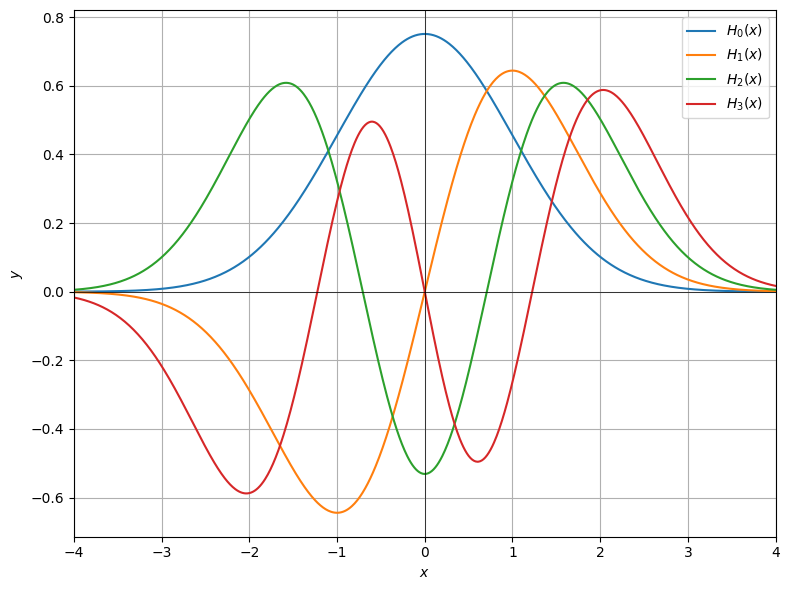

In [18]:
xx = np.linspace(-4, 4, 801)
N = 3

plt.figure(figsize=(8, 6))
for n in range(N + 1):
    yy = SHO_eigenfunc(n, xx)
    plt.plot(xx, yy, label=f'$H_{{{n}}}(x)$')

plt.axhline(0, color='black', linewidth=0.5)  # Draw horizontal x-axis
plt.axvline(0, color='black', linewidth=0.5)  # Draw vertical y-axis
plt.xlim(-4, 4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()
    

(b)	Plot the harmonic oscillator wavefunctions for $n = 30$ within the $x$ range $–10$ to $10$.

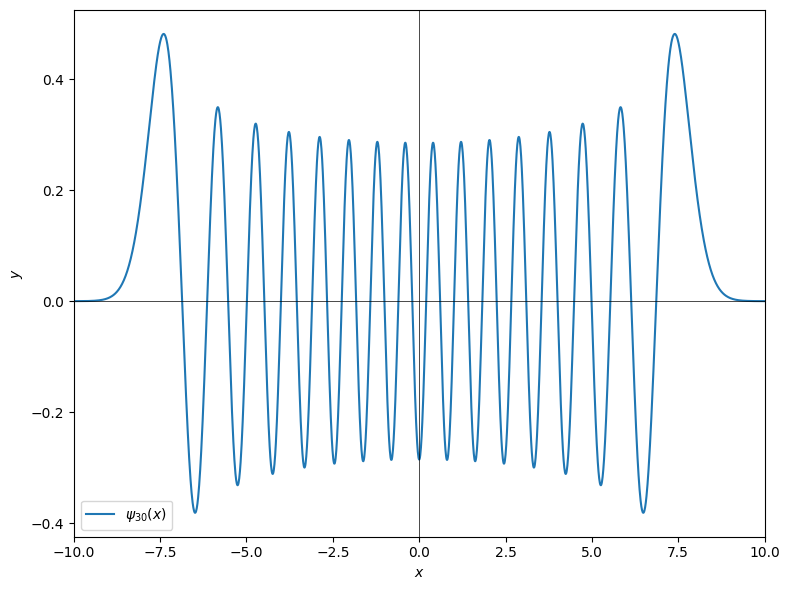

In [19]:
xx = np.linspace(-10, 10, 2001)
n = 30

plt.figure(figsize=(8, 6))
yy = SHO_eigenfunc(n, xx)
plt.plot(xx, yy, label=f'$\\psi_{{{n}}}(x)$')

plt.axhline(0, color='black', linewidth=0.5)  # Draw horizontal x-axis
plt.axvline(0, color='black', linewidth=0.5)  # Draw vertical y-axis
plt.xlim(-10, 10)
# plt.ylim(-10, 10)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tight_layout()
plt.show()
    

(c)	The quantum uncertainty in the position of a particle in the $n$-th level of a harmonic oscillator can be quantified its root-mean-square position $\sqrt{\langle x^2 \rangle}$, where
$$\sqrt{\langle x^2 \rangle} = \int_{-\infty}^{\infty} x^2|\psi_n(x)|^2 dx$$
Evaluate the integral using gaussian quadrature on 100 points, then calculates the uncertainty for a given value of $n$. What is the uncertainty for $n = 5$?

Use below substitution to treat infinite interval
$$
\int_{-\infty}^{\infty} x^2|\psi_n(x)|^2\ dx
=\int_{-\pi/2}^{\pi/2} \tan^2 u|\psi_n(\tan u)|^2 \sec^2 u\ du
$$

In [20]:
def legendre_roots(n):
    return np.polynomial.legendre.legroots(np.polynomial.legendre.Legendre.basis(n).coef)

def legendre_derivative(n, x):
    Pn = np.polynomial.legendre.Legendre.basis(n)
    dPn = Pn.deriv()
    return dPn(x)

def gaussian_quadrature_unit(N):
    x = legendre_roots(N)
    dpdx = legendre_derivative(N, x)
    w = 2/(1-x**2)/(dpdx**2)
    return x,w

def gaussian_quadrature(N, a, b):
    x, w = gaussian_quadrature_unit(N)
    return 1/2*(b - a)*x + 1/2*(b + a), 0.5*(b - a)*w

def gaussian_quadrature_integration(f, a, b, N):
    x, w = gaussian_quadrature(N, a, b)
    return np.sum(w * f(x))

In [21]:
N = 100
n = 5

interval = [-np.pi / 2, np.pi / 2]

def f(x):
    return (np.tan(x) ** 2) * (np.abs(SHO_eigenfunc(5, np.tan(x))) ** 2) * (1 / (np.cos(x) ** 2))

uncertainty = gaussian_quadrature_integration(f, *interval, N)
print(f"The uncertainty is about {uncertainty:.4f}")

The uncertainty is about 5.5000


# 4. Image processing and the STM, Exercise 5.23 

When light strikes a surface, the amount falling per unit area depends not only on the intensity of the light, but also on the angle of incidence. If the direction the light is coming from makes an angle $\theta$ to the normal, then the light only “sees” $\cos\theta$ of area per unit of actual area on the surface:
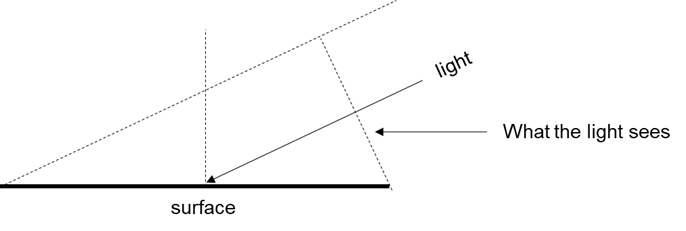

So the intensity of illumination is $a\cos\theta$, if $a$ is the raw intensity of light. Suppose that we are looking down on the Earth from above and we see mountains. We know the height of the mountains $w(x, y)$ as a function of position in the plane, so the equation for the Earth’s surface is simply $z=w(x, y)$ or equivalently $z - w(x, y) = 0$. and the normal vector $\mathbf v$ to the surface is given by the gradient of $z - w(x, y) = 0$ thus:
$$\mathbf v = \nabla\left[z-w(x, y)\right]=\begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y} \\ \frac{\partial}{\partial z}\end{pmatrix}\left[z-w(x, y)\right] = \begin{pmatrix}-\frac{\partial w}{\partial x} \\ -\frac{\partial w}{\partial y} \\ 1\end{pmatrix}$$
Now we suppose we have incident light represented by a vector $\mathbf a$ that points toward the source of the light and has magnitude equal to the intensity. The dot product of the vectors $\mathbf a$ and $\mathbf v$ is 
$$\mathbf a\cdot\mathbf v=\|\mathbf a\|\|\mathbf v\|\cos\theta$$
Where $\theta$ is the angle between the vectors. Then the intensity of illumination of the surface of the mountain is then
$$I =\|\mathbf a\|\cos\theta = \frac{\mathbf a\cdot\mathbf v}{\|\mathbf v\|} = \frac{-a_x(\partial w/\partial x)-a_y(\partial w/\partial y)+a_z}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}$$
Let’s take the simple case where the light is shining horizontally with unit intensity, and the direction it’s coming from makes an angle $\phi$ to the east-west so that $\mathbf a = (\cos\phi, \sin\phi, 0)$. Then Then the intensity of illumination simplifies to
$$I = \frac{-\cos\phi(\partial w/\partial x)-\sin\phi(\partial w/\partial y)}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}$$
If we calculate the derivatives of the height $w(x, y)$ and know $\phi$, we can calculate the intensity at any point.

(a)	Download the file altitude.txt from the on-line resources:

https://public.websites.umich.edu/~mejn/cp/programs.html

which contains the altitude $w(x, y)$ in meters above sea level of the surface earth, measured on a grid points $(x, y)$. Read the txt file and calculate the derivatives $\partial w/\partial x$ and $\partial w/\partial y$. The distance between gid points is 30000 m. Explain how you calculate the derivatives and plot 2D grid for each derivative ($\partial w/\partial x$ and $\partial w/\partial x$) with a color bar.

In [22]:
url = "https://public.websites.umich.edu/~mejn/cp/data/altitude.txt"
response = requests.get(url)

if response.status_code == 200:
    with open("altitude.txt", "w+") as f:
        f.write(response.text)
    print("File downloaded and saved as altitude.txt")
else:
    print("Failed to download the file, status code:", response.status_code)

File downloaded and saved as altitude.txt


In [23]:
w_lists = []
with open("altitude.txt", "r") as f:
    for line in f:
        w_lists.append(list(map(float, line.strip().split())))
w_arr = np.array(w_lists)
w_arr.shape

(512, 1024)

to calculate accurate partial derivatives, use second or higher-order numerical differentation methods. `np.gradient` actually implementing this method.

$$f_x(x, y)\approx\frac{f(x + h, y) - f(x - h, y)}{2h} = \frac{\mathrm{w}[i + 1][j] - \mathrm{w}[i - 1][j]}{2 dx}$$

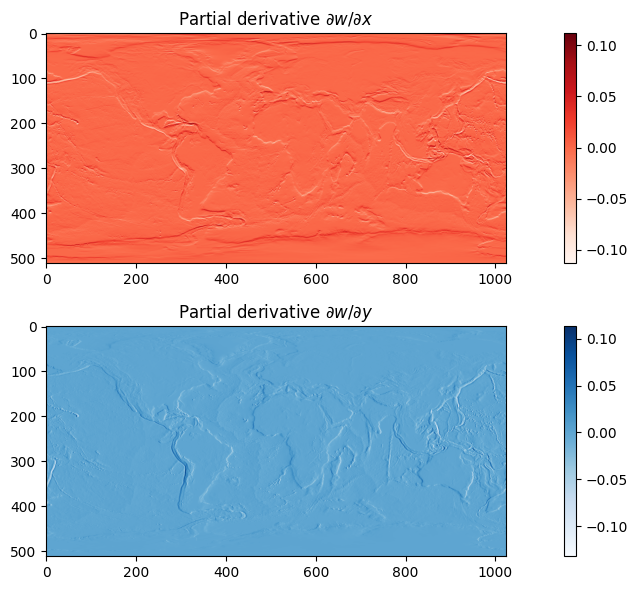

In [24]:
dx = 30000
dy = 30000
dwdx, dwdy = np.gradient(w_arr, dx, dy)
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

im1 = axs[0].imshow(dwdx, cmap="Reds")
axs[0].set_title("Partial derivative $\\partial w/\\partial x$")
fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(dwdy, cmap="Blues")
axs[1].set_title("Partial derivative $\\partial w/\\partial y$")
fig.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()


(b) Using your derivatives, calculate the intensity $I$ for each grid point, with $\phi=45^\circ$, and make a density plot (use `imshow`) of the resulting values. Probably you will get minus values for I, what does a negative intensity mean?

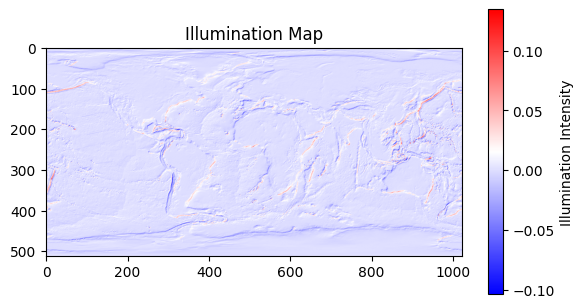

In [25]:
phi = np.pi / 4
a = np.array([np.cos(phi), np.sin(phi), 0])
normal = np.stack([-dwdx, -dwdy, np.ones_like(w_arr)])
normal = np.transpose(normal, (1, 2, 0))
normal /= np.linalg.norm(normal, axis=-1)[:, :, np.newaxis]
intensity = np.einsum('...i,i->...', normal, a)

plt.figure(figsize=(6, 6))
im = plt.imshow(intensity, cmap="bwr")
cb = plt.colorbar(im, shrink=0.5)  # Colorbar shortened by half
cb.set_label("Illumination Intensity")
plt.title("Illumination Map")
plt.tight_layout()
plt.show()

negative intensity means $\mathbf a\cdot\mathbf v$ has negative value. i.e. they are in opposite direction. It means the light may does not reach directly that area.

(c)	Download the file stm.txt from the on-line resources:

https://public.websites.umich.edu/~mejn/cp/programs.html

which contains a grid value from scanning tunneling microscope measurements of the (111) surface of silicon. A scanning tunneling microscope (STM) is a device that measures the shape of surfaces at the atomic level by tracking a sharp tip over the surface and measuring quantum tunneling current as a function of position. The end result is a grid of values that represent the height of the surface as a function of position and the data in the file stm.txt just such a grid of values. Modify the program you just wrote to visualize the STM data and hence create a 3D picture of what the silicon surface looks like. The value of h for the derivatives in this case is around h = 2.5 (in arbitrary units). 

In [26]:
import requests

url = "https://public.websites.umich.edu/~mejn/cp/data/stm.txt"
response = requests.get(url)

if response.status_code == 200:
    with open("stm.txt", "w+") as f:
        f.write(response.text)
    print("File downloaded and saved as stm.txt")
else:
    print("Failed to download the file, status code:", response.status_code)


File downloaded and saved as stm.txt


In [27]:
w_lists = []
with open("stm.txt", "r") as f:
    for line in f:
        w_lists.append(list(map(float, line.strip().split())))
w_arr = np.array(w_lists)
w_arr.shape

(663, 676)

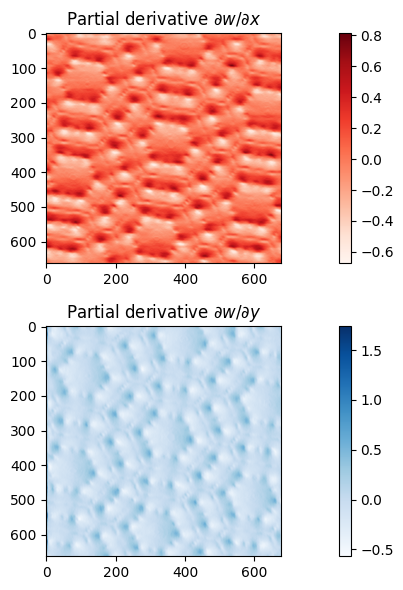

In [28]:
dx = 2.5
dy = 2.5
dwdx, dwdy = np.gradient(w_arr, dx, dy)
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

im1 = axs[0].imshow(dwdx, cmap="Reds")
axs[0].set_title("Partial derivative $\\partial w/\\partial x$")
fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(dwdy, cmap="Blues")
axs[1].set_title("Partial derivative $\\partial w/\\partial y$")
fig.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()


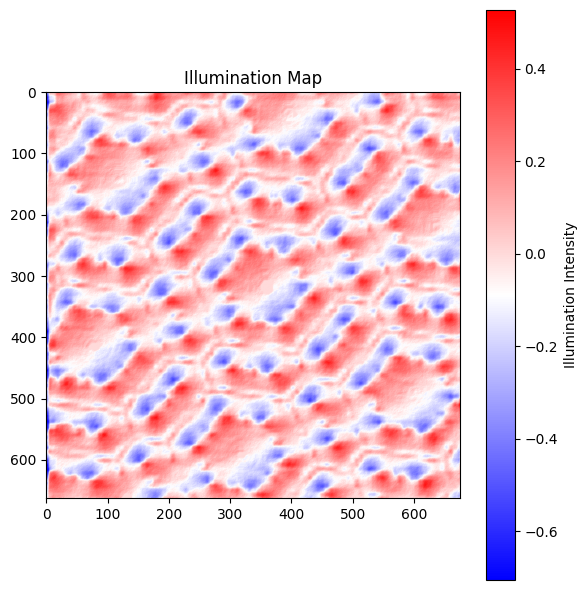

In [29]:
phi = np.pi / 4
a = np.array([np.cos(phi), np.sin(phi), 0])
normal = np.stack([-dwdx, -dwdy, np.ones_like(w_arr)])
normal = np.transpose(normal, (1, 2, 0))
normal /= np.linalg.norm(normal, axis=-1)[:,:,np.newaxis]
intensity = np.einsum('...i,i->...', normal, a)

plt.figure(figsize=(6, 6))
im = plt.imshow(intensity, cmap="bwr")
cb = plt.colorbar(im)
cb.set_label("Illumination Intensity")
plt.title("Illumination Map")
plt.tight_layout()
plt.show()

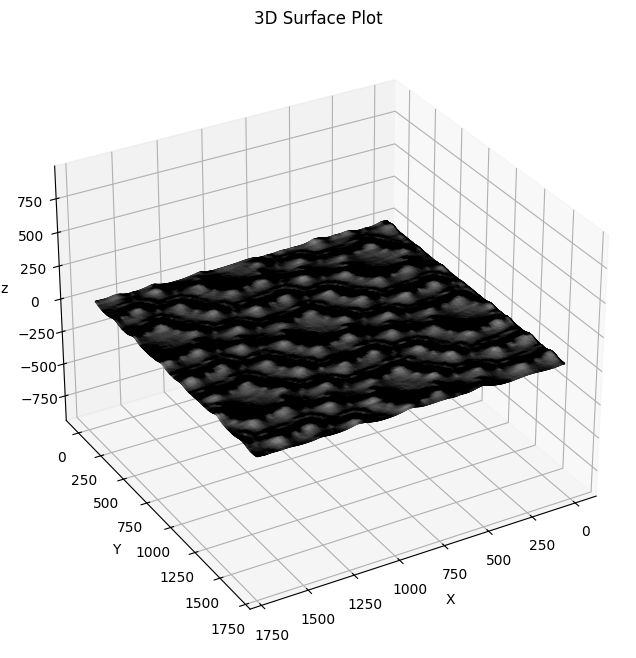

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

ny, nx = w_arr.shape
x = np.arange(nx) * dx
y = np.arange(ny) * dy
X, Y = np.meshgrid(x, y)

intensity = np.maximum(intensity, 0) / np.max(intensity)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=30, azim=60)

surf = ax.plot_surface(X, Y, w_arr, facecolors=plt.cm.gray(intensity),
                       rstride=1, cstride=1, antialiased=True)


ax.set_title("3D Surface Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("z")

# setting the ratio by 1:1:1
def set_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])
    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

set_axes_equal(ax)

plt.show()